In [423]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from enum import Enum

In [424]:
# reading data
#db available at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
db_filename = 'adult.data'

# to ensure that we don't hardcode the filter values.
class FilterValuesEnum(Enum):
    NotApplicableValue="?"
    LessThanFiftySalaryString="<=50K"
    MoreThanFiftySalaryString=">50K"
    ColumnSeperatorValue=","

#to ensure we don't make any mistakes while using column names
# More info about column names in https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
class ColumnNames(Enum):
    Age='Age'
    WorkClass='WorkClass'
    FinalWeight='Final Weight'
    Education='Education'
    EducationNum='Education-Num'
    MaritalStatus='Marital-Status'
    Occupation='Occupation'
    Relationship='Relationship'
    Race='Race'
    Sex='Sex'
    CapitalGain='Capital-Gain'
    CapitalLoss='Capital-Loss'
    HoursPerWeek='Hours Per Week'
    CountryOfOrigin='Country of Origin'
    SalaryFigure='Salary Figure'
    SalaryMoreThanFifty='Is Salary More than Fifty Thousand'
    SalaryLessThanFifty='Is Salary Less than Fifty Thousand'

column_Names = [columnName.value for columnName in ColumnNames]
missing_values = [FilterValuesEnum.NotApplicableValue.value]
actualDataFrame = pd.read_csv(db_filename, sep=FilterValuesEnum.ColumnSeperatorValue.value, names=column_Names, na_values=missing_values, skipinitialspace = True)
actualDataFrame[ColumnNames.SalaryLessThanFifty.value] = actualDataFrame[ColumnNames.SalaryFigure.value] == FilterValuesEnum.LessThanFiftySalaryString.value
actualDataFrame[ColumnNames.SalaryMoreThanFifty.value] = actualDataFrame[ColumnNames.SalaryFigure.value] == FilterValuesEnum.MoreThanFiftySalaryString.value
numberOfRows = len(actualDataFrame)
print(actualDataFrame.loc[13])

Age                                              32
WorkClass                                   Private
Final Weight                                 205019
Education                                Assoc-acdm
Education-Num                                    12
Marital-Status                        Never-married
Occupation                                    Sales
Relationship                          Not-in-family
Race                                          Black
Sex                                            Male
Capital-Gain                                      0
Capital-Loss                                      0
Hours Per Week                                   50
Country of Origin                     United-States
Salary Figure                                 <=50K
Is Salary More than Fifty Thousand            False
Is Salary Less than Fifty Thousand             True
Name: 13, dtype: object


In [425]:
# Inferring which columns have ?, NAN values
print(actualDataFrame.loc[14])
# print(actualDataFrame['Salary Figure'][0])
# print(type(actualDataFrame['Salary Figure'][0]))
# print(actualDataFrame['Salary Figure'] == ' <=50K')
#print('?' in actualDataFrame.loc[27]['WorkClass'])
#print(actualDataFrame['WorkClass'].str[1].contains(' \?'))
#questionValue = actualDataFrame['WorkClass']
#print((actualDataFrame['WorkClass'] != ' ?'))
#print(len(list(filter(lambda x: x == False, questionValue))))
#.str.contains('?')
#print(questionValue)
#print(questionValue.str[0])
# questionFrame = actualDataFrame['WorkClass'].str.replace(" ","").str.contains('?')
# trueList = list(filter(lambda x: x == True, questionFrame))
#print(len(trueList))
#print(actualDataFrame.loc[[2,3]])
#print(actualDataFrame.tail())
#print(actualDataFrame.head())
# print(actualDataFrame.loc[[0]])
# print(actualDataFrame.loc[0][2])
# print(type(actualDataFrame['WorkClass'][0]))
# print(actualDataFrame['WorkClass'])
#print(actualDataFrame.loc[actualDataFrame['WorkClass']])
# slt = actualDataFrame['WorkClass'].str == '?'
# print(slt)
#print(actualDataFrame['WorkClass'].isnull())
# for indexValue, individualColumn in enumerate(column_Names):
#     print("index value: + {1} + {0}".format(type(actualDataFrame.loc[0][individualColumn]), str(indexValue)))
#     #print(individualColumn)
    #print(actualDataFrame[individualColumn])
    #print(actualDataFrame.loc[actualDataFrame[individualColumn] == '?'])
#    print(type(actualDataFrame[[0]])
#     doesUnknowValuesExistForThisColumn = (actualDataFrame.loc[actualDataFrame[individualColumn].str.contains(pat = '*?*', regex = True)]).empty
#     if not doesUnknowValuesExistForThisColumn:
#         print('{0} has empty values'.format(individualColumn))

Age                                                   40
WorkClass                                        Private
Final Weight                                      121772
Education                                      Assoc-voc
Education-Num                                         11
Marital-Status                        Married-civ-spouse
Occupation                                  Craft-repair
Relationship                                     Husband
Race                                  Asian-Pac-Islander
Sex                                                 Male
Capital-Gain                                           0
Capital-Loss                                           0
Hours Per Week                                        40
Country of Origin                                    NaN
Salary Figure                                       >50K
Is Salary More than Fifty Thousand                  True
Is Salary Less than Fifty Thousand                 False
Name: 14, dtype: object


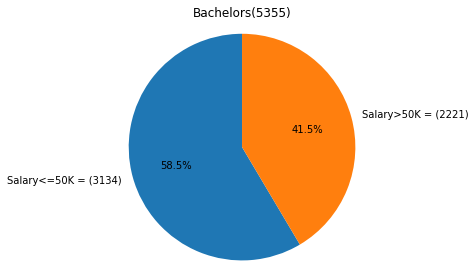

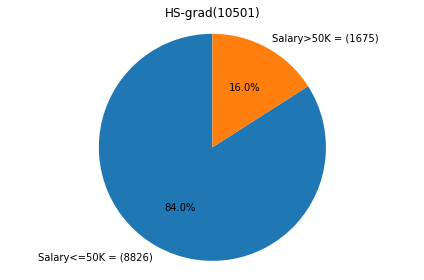

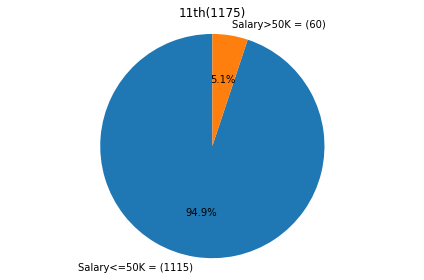

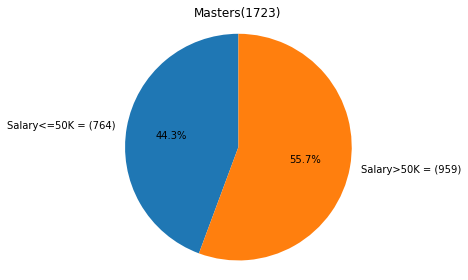

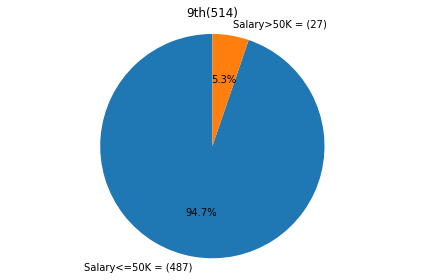

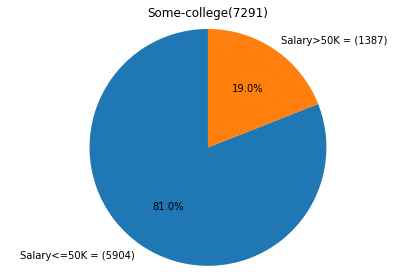

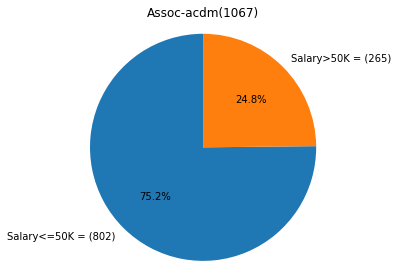

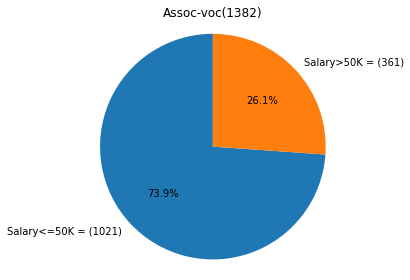

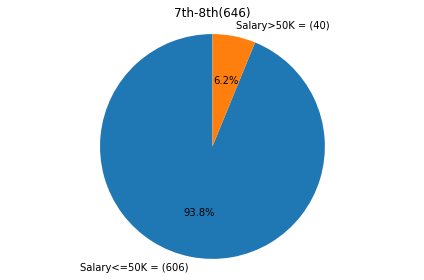

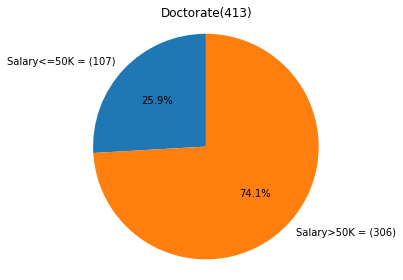

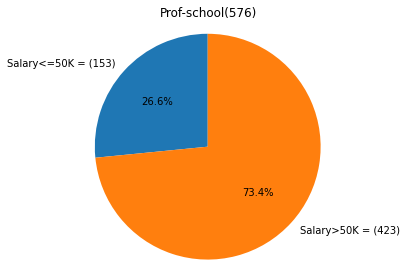

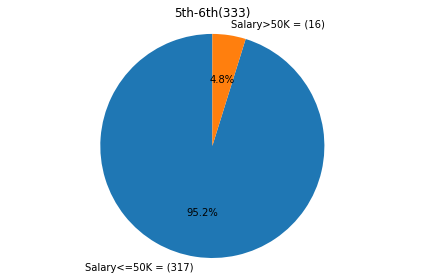

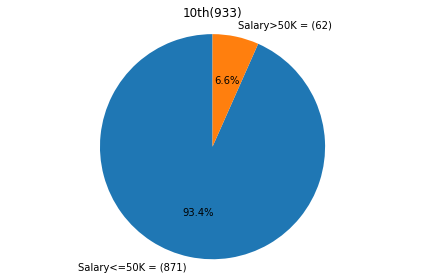

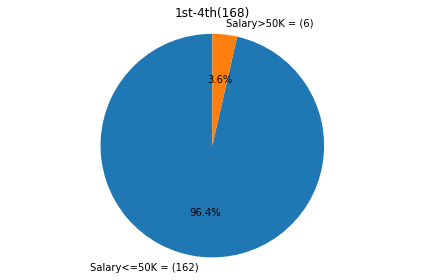

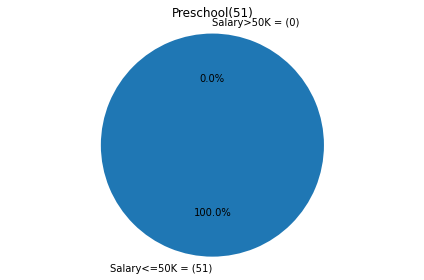

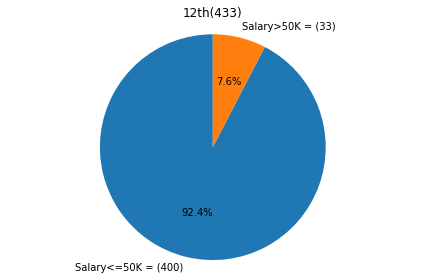

In [427]:
#pie chart for all signs
# print(actualDataFrame[ColumnNames.Education.value])
#print(actualDataFrame.loc[actualDataFrame[ColumnNames.Education.value] == 'Bachelors'])
# print(((actualDataFrame[ColumnNames.Education.value]=='Bachelors')[0:numberOfRows] == True))
#print(actualDataFrame.loc[(actualDataFrame[ColumnNames.Education.value] == 'Bachelors') & (actualDataFrame[ColumnNames.SalaryLessThanFifty.value] == False)])
uniqueEducationValues = actualDataFrame[ColumnNames.Education.value].unique()
pieLabels = ['Salary<=50K', 'Salary>50K']
educationSalaryValues = {}

for differentEducationValues in uniqueEducationValues:
    educationSalaryValues.setdefault(differentEducationValues, [0,0])
    educationSpecificData = actualDataFrame.loc[actualDataFrame[ColumnNames.Education.value] == differentEducationValues]
    individualEducationCountLessThanFiftyK = len(educationSpecificData.loc[educationSpecificData[ColumnNames.SalaryLessThanFifty.value] == True])
    educationSalaryValues[differentEducationValues] = [individualEducationCountLessThanFiftyK, len(educationSpecificData) - individualEducationCountLessThanFiftyK]
    educationSpecificPieLabels = [pieLabel+' = ('+str(eduSalaryValue)+')' for pieLabel,eduSalaryValue in zip(pieLabels, educationSalaryValues[differentEducationValues])]
    fig,ax = plt.subplots()
    
    patches, texts, autotexts = ax.pie(educationSalaryValues[differentEducationValues], labels=educationSpecificPieLabels, autopct='%1.1f%%', startangle=90, shadow=False)
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.axis('equal') 
    ax.set_title('{0}({1})'.format(differentEducationValues, reduce(lambda x,y: x+y, educationSalaryValues[differentEducationValues])))
    plt.tight_layout()
    plt.show()

In [ ]:
#stacked bar chart with lines indicating each values